# IMPORTING NECESSARY LIBRARIES

In [61]:
import numpy as np
import pandas as pd
from matplotlib import *
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the Dataset

# Exploratory Data Analysis

In [63]:
# Loading the 'titanic.csv' dataset into a pandas DataFrame .
df=pd.read_csv("/content/drive/MyDrive/titanic_train.csv")

In [64]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [65]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [66]:
df.shape

(891, 12)

In [67]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [68]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [69]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [70]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [71]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Replacing Male with 1 , and Female with 0

In [72]:
df=df.replace(to_replace=["male","female"],value=[1,0])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [73]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


# Statistics

In [74]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
#correlation Matrix
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


# HEATMAP

Made using Correlation Matrix

<Axes: >

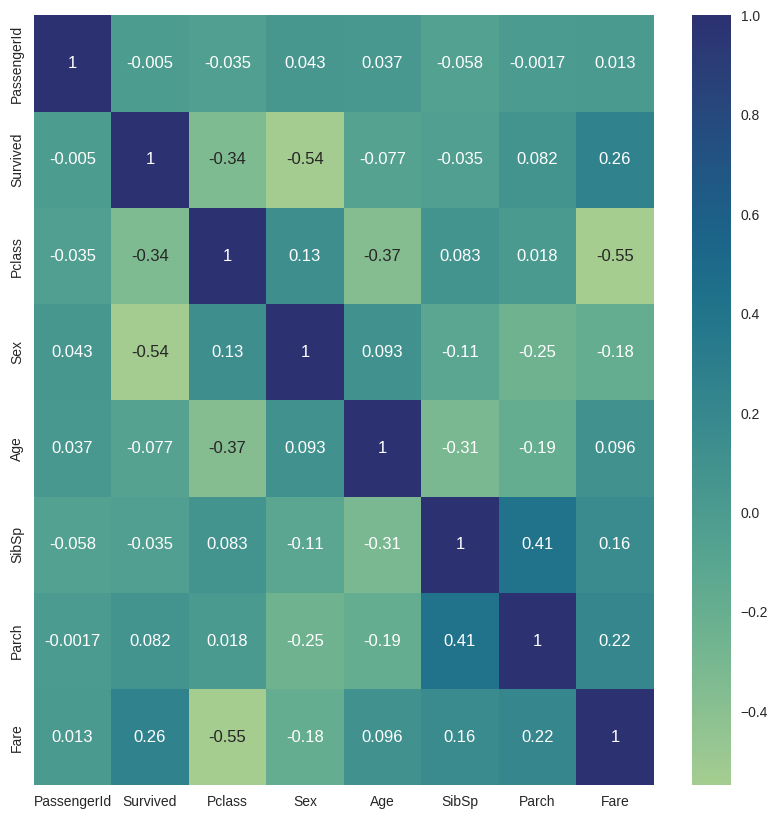

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, cmap='crest')

<Axes: ylabel='Frequency'>

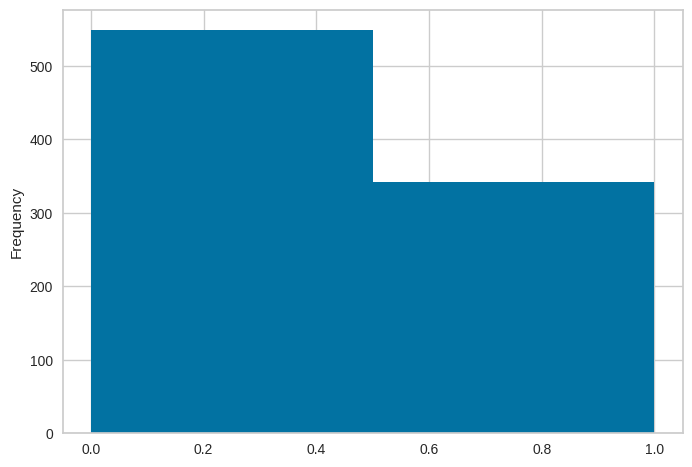

In [77]:
#Histogram
df['Survived'].plot(kind= 'hist',bins=2)

<Axes: ylabel='Frequency'>

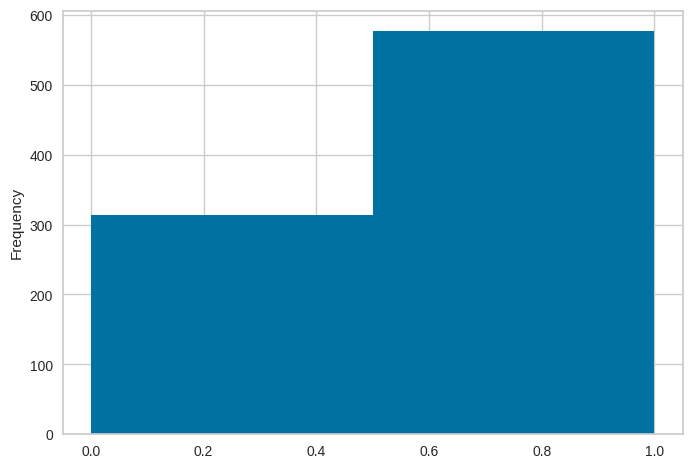

In [78]:
#Histogram
df['Sex'].plot(kind= 'hist',bins=2)

<Axes: ylabel='Frequency'>

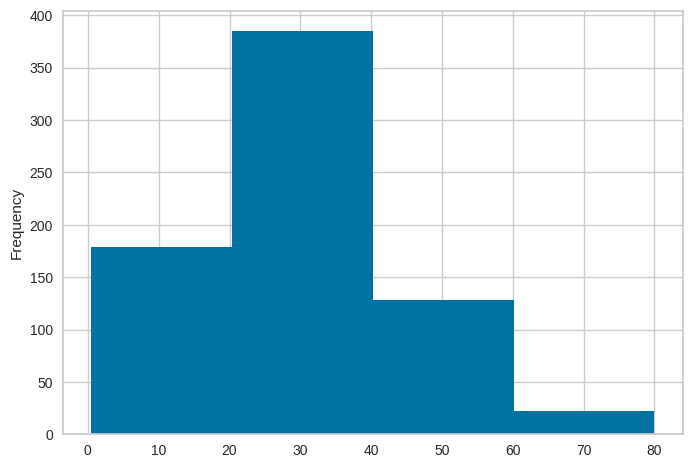

In [79]:
#Histogram
df['Age'].plot(kind= 'hist',bins=4)

<Axes: ylabel='Frequency'>

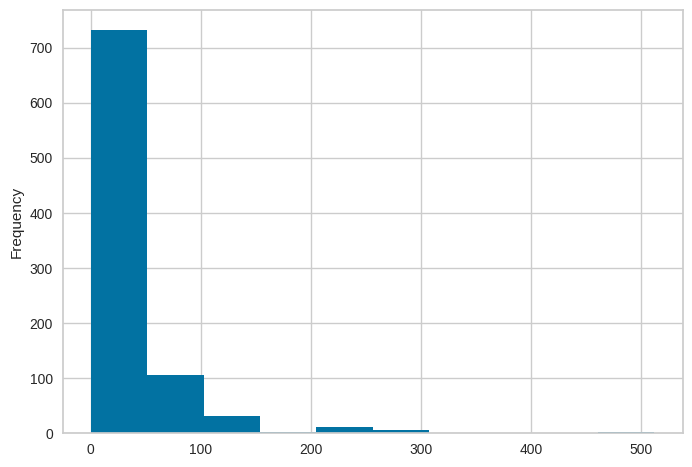

In [80]:
#Histogram
df['Fare'].plot(kind= 'hist',bins=10)

# BOXPLOT

<Axes: >

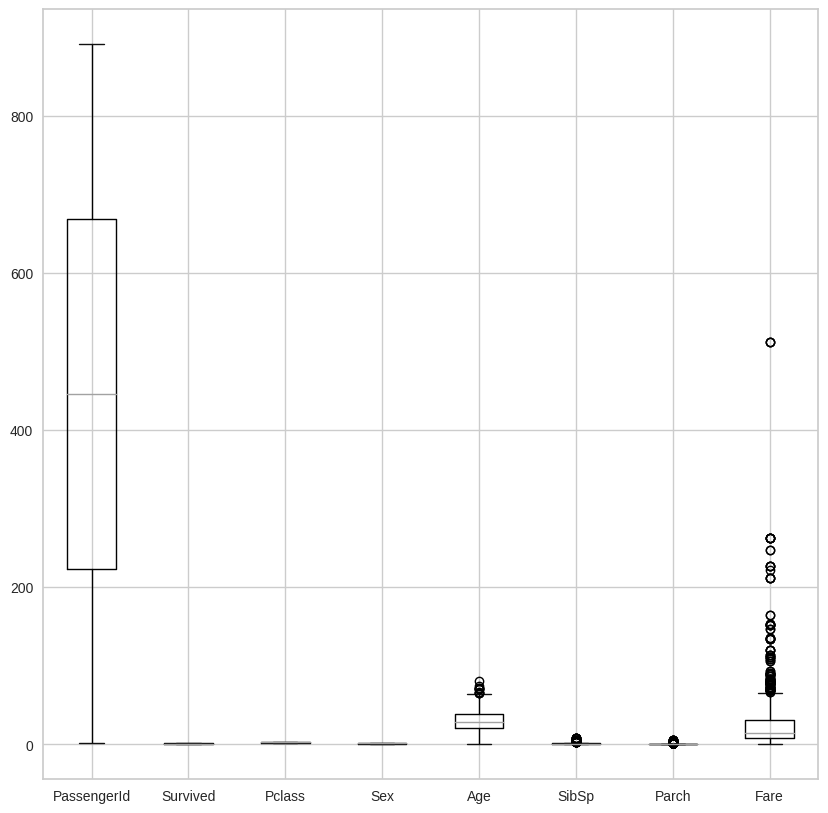

In [81]:
#Plot a Boxplot
plt.figure(figsize=(10,10))
df.boxplot()

In [82]:
df=df.dropna(axis=0)
x = np.array(df.drop(['Survived','Name','Cabin','Embarked','Ticket','PassengerId'], axis=1))
y=np.array(df.Survived)
#if axis =1 , drop a column
#if axis =0 , drop a row

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)


In [84]:
len(x_train),len(y_train)

(137, 137)

In [85]:
len(x_test),len(y_test)

(46, 46)

# Choosing a Particular algorithm(Logistic regression)

In [86]:
logreg = LogisticRegression(max_iter=1000)

In [87]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction

In [88]:
y_test

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0])

In [89]:
y_pred = logreg.predict(x_test)

In [90]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1])

# Accuracy

In [91]:
logreg.score(x_test,y_test)

0.717391304347826

In [92]:
from sklearn.metrics import classification_report

In [93]:
logreg.score(x_test,y_test)

0.717391304347826

In [94]:
df.columns
'Survived','Name','Cabin','Embarked','Ticket','PassengerId'

('Survived', 'Name', 'Cabin', 'Embarked', 'Ticket', 'PassengerId')

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S


In [96]:
li=[]
li.append(int(input("Enter the Pclass")))
li.append(int(input("Enter the Sex")))
li.append(int(input("Enter the Age")))
li.append(int(input("Enter the SibSp")))
li.append(int(input("Enter the Parch")))
li.append(float(input("Enter the Fare")))
input_array = np.array(li).reshape(1,-1)
pred=logreg.predict(input_array)
if pred==0:
  print("OHH RIP!!!!!!!!!")
else:
  if li[1] == 0:
    print("LUCKY WOMAN")
  else:
    print("LUCKY MAN")


Enter the Pclass1
Enter the Sex1
Enter the Age20
Enter the SibSp1
Enter the Parch1
Enter the Fare2000
LUCKY MAN


# PYCARET library

In [97]:
!pip install pycaret

In [98]:
import pycaret

In [99]:
from pycaret.datasets import get_data

In [100]:
from pycaret.classification import *
exp = setup(data=df, target='Survived',train_size=0.75, session_id=123)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(183, 12)"
4,Transformed data shape,"(183, 14)"
5,Transformed train set shape,"(137, 14)"
6,Transformed test set shape,"(46, 14)"
7,Numeric features,7
8,Categorical features,4
9,Preprocess,True


In [101]:
best_model = compare_models(fold=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7737,0.8020,0.8913,0.7970,0.8403,0.4558,0.4717,2.2825
ridge,Ridge Classifier,0.7372,0.0000,0.9022,0.7587,0.8217,0.3310,0.3607,0.4900
nb,Naive Bayes,0.6790,0.4916,1.0000,0.6768,0.8071,0.0298,0.0629,0.5650
dt,Decision Tree Classifier,0.6716,0.5000,1.0000,0.6716,0.8035,0.0000,0.0000,1.0225
qda,Quadratic Discriminant Analysis,0.6716,0.1250,1.0000,0.6716,0.8035,0.0000,0.0000,1.2725
ada,Ada Boost Classifier,0.6716,0.5000,1.0000,0.6716,0.8035,0.0000,0.0000,0.7700
gbc,Gradient Boosting Classifier,0.6716,0.5000,1.0000,0.6716,0.8035,0.0000,0.0000,0.8550
lda,Linear Discriminant Analysis,0.6716,0.5000,1.0000,0.6716,0.8035,0.0000,0.0000,0.4150
xgboost,Extreme Gradient Boosting,0.6716,0.5405,1.0000,0.6716,0.8035,0.0000,0.0000,0.5200
lightgbm,Light Gradient Boosting Machine,0.6716,0.5000,1.0000,0.6716,0.8035,0.0000,0.0000,0.9800


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [102]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [103]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8750,1.0000,0.8333,0.9091,0.5882,0.6455
1,0.9286,0.9500,1.0000,0.9091,0.9524,0.8108,0.8257
2,0.6429,0.8444,0.8889,0.6667,0.7619,0.1026,0.1217
3,0.5714,0.7111,0.5556,0.7143,0.6250,0.1429,0.1491
4,0.8571,0.9111,1.0000,0.8182,0.9000,0.6585,0.7006
5,0.6429,0.5556,0.7778,0.7000,0.7368,0.1860,0.1886
6,0.7143,0.8000,0.7778,0.7778,0.7778,0.3778,0.3778
7,0.8462,0.8889,0.8889,0.8889,0.8889,0.6389,0.6389
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [104]:
predictions = predict_model(tuned_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8470,0.9070,0.9350,0.8519,0.8915,0.6341,0.6420


In [105]:
predictions

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,prediction_label,prediction_score
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.283302,C85,C,1,1,0.9102
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.099998,C123,S,1,1,0.8046
6,7,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.862499,E46,S,0,0,0.8688
10,11,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.700001,G6,S,1,1,0.9328
11,12,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.549999,C103,S,1,1,0.7064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.554199,D35,S,1,1,0.9288
872,873,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5.000000,B51 B53 B55,S,0,1,0.5548
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.158302,C50,C,1,1,0.9235
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.000000,B42,S,1,1,0.9673


In [106]:
# save the model
from pycaret import classification
classification.save_model(tuned_model, 'Best')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['PassengerId', 'Pclass', 'Sex',
                                              'Age', 'SibSp', 'Parch', 'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_im...
                                                               handle_unknown='value'

In [107]:
# load model
Best_model = classification.load_model(model_name='Best')

Transformation Pipeline and Model Successfully Loaded


In [108]:
predictions = predict_model(Best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8470,0.9070,0.9350,0.8519,0.8915,0.6341,0.6420


In [109]:
predicted_labels = predictions['prediction_label']
true_labels = predictions['Survived']


In [110]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy = accuracy_score(true_labels, predicted_labels)

In [112]:
accuracy

0.8469945355191257

In [113]:
tuned_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
tuned_model.score(x_test,y_test)

0.717391304347826